In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
%matplotlib inline
import nltk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.patches as mpatches
nltk.download('stopwords')

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('../data/csv/cleaned/ta-lion-clean.csv')
df.head

<bound method NDFrame.head of                                                   text  label
0    masuk kabin sebelum take off dan keluar setela...      0
1    petugas lion air memasukkan sampah ke dalam ko...      0
2    Ngantri sejam di check in counter, pelayananny...      0
3    pesawat saya dari pekanbaru ke batam jam 9 pag...      0
4    Kalau masih sayang diri, keluarga, waktu dan k...      0
..                                                 ...    ...
503  pramugari nya ramah ramah. makanan nya enak te...      1
504  Terbang dengan Batik Air 7153 rute CGK-SIN (A3...      1
505  Pertama kali saya naik Batik Air . fasilitasny...      1
506  Pengalaman saya hampir tiap tahun menggunakan ...      1
507  Kalau pakai lion air tidak usah berekspetasi m...      1

[508 rows x 2 columns]>

In [3]:
df.groupby('label').count().plot(kind='bar')

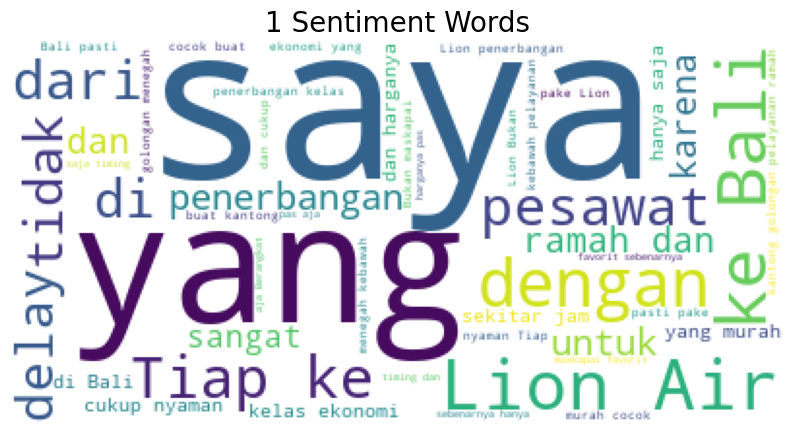

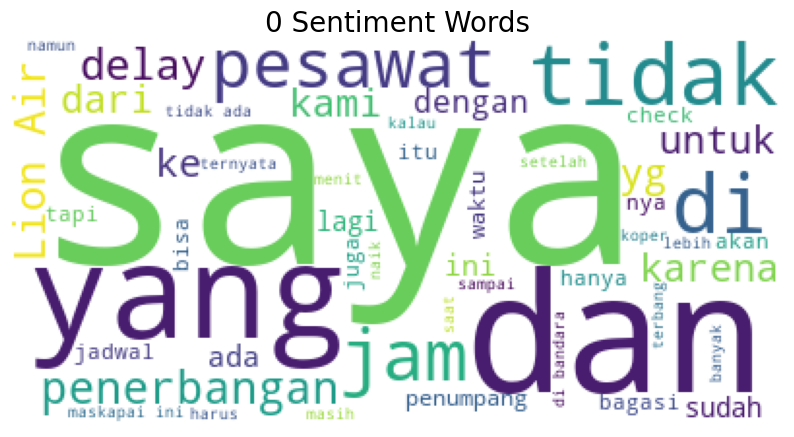

In [4]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, label):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.label==label]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(label), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 1)
     
# Negative tweet words
wordcount_gen(df, 0)
     

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

factory=StemmerFactory()
stemmer=factory.create_stemmer()
stopwords_ind=stopwords.words('indonesian')

def text_to_words(text):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    review = text.lower()
    # remove non letters
    review = re.sub(r"[^a-zA-Z0-9]", " ", review)
    # tokenize
    words = review.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords_ind]
    # apply stemming
    words = [stemmer.stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][0])
print("\nProcessed tweet ->", text_to_words(df['text'][0]))


Original tweet -> masuk kabin sebelum take off dan keluar setelah landing sangat tidak terstruktur, berantakan, udah gitu penumpang berisik. nunggu bagasi sampai satu jam. sangat buruk.

Processed tweet -> ['masuk', 'kabin', 'take', 'off', 'landing', 'struktur', 'beranta', 'udah', 'gitu', 'tumpang', 'berisik', 'nunggu', 'bagasi', 'jam', 'buruk']


In [6]:
X = list(map(text_to_words, df['text']))

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['label'])

In [8]:
print(X[0])
print(Y[0])

['masuk', 'kabin', 'take', 'off', 'landing', 'struktur', 'beranta', 'udah', 'gitu', 'tumpang', 'berisik', 'nunggu', 'bagasi', 'jam', 'buruk']
0


In [9]:
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [11]:
print(count_vector.get_feature_names()[0:200])

['00', '000', '01', '04', '05', '06', '07', '077', '08', '09', '1', '10', '100', '11', '12', '124', '13', '14', '15', '150rb', '15an', '15rb', '16', '160', '17', '175', '18', '180', '1851', '1857', '19', '1b', '1c', '1hari', '1jam', '1x', '2', '20', '200', '2011', '2012', '2016', '2017', '2018', '2019', '20kg', '20menit', '20x', '21', '22', '23', '24', '25', '28', '280', '290', '2jam', '2x', '3', '30', '300', '30menit', '343', '35', '3jam', '3nomor', '3x', '4', '40', '400', '440', '45', '4jam', '5', '50', '50k', '55', '585', '599', '5jam', '5menit', '6', '60', '7', '7153', '737', '747', '7kg', '8', '800', '82', '821', '85', '9', '90', '900', '900er', '906', '9am', 'a', 'a2', 'a3', 'a320', 'abc', 'abdi', 'abrik', 'absen', 'ac', 'access', 'accident', 'acnya', 'action', 'actually', 'acuh', 'ad', 'ada', 'adek', 'adill', 'adisucipto', 'administrasi', 'aebelum', 'agam', 'agency', 'agent', 'agung', 'agustus', 'ahli', 'air', 'airasia', 'airbus', 'airline', 'airlines', 'airport', 'aja', 'ajaa',

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



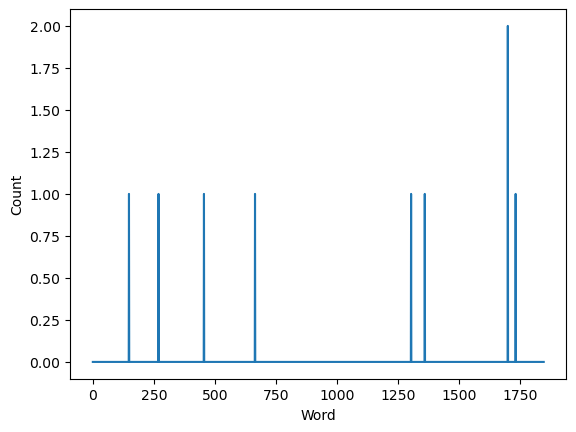

In [12]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 50000
max_len=5000

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0])
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 masuk kabin sebelum take off dan keluar setelah landing sangat tidak terstruktur, berantakan, udah gitu penumpang berisik. nunggu bagasi sampai satu jam. sangat buruk.
After Tokenization & Padding 
 [109 137 158 ...   0   0   0]


In [37]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [38]:
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (304, 5000) (304, 2)
Validation Set -> (102, 5000) (102, 2)
Test Set -> (102, 5000) (102, 2)


In [39]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 50000
embedding_size = 32
epochs=35
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



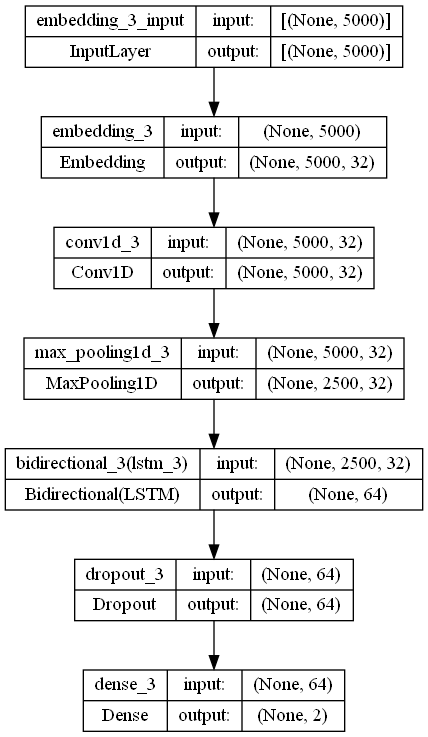

In [41]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [42]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5000, 32)          1600000   
                                                                 
 conv1d_3 (Conv1D)           (None, 5000, 32)          3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2500, 32)         0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [47]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8235
Precision : 0.8235
Recall    : 0.8235
F1 Score  : 0.8235


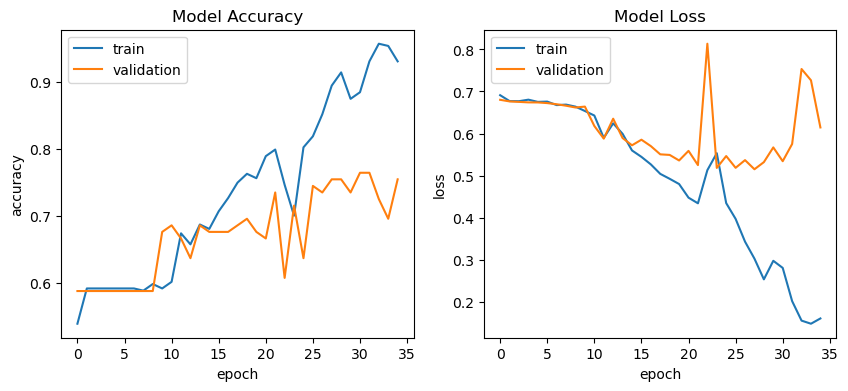

In [48]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)


4/4 [==============================] - 1s 333ms/step


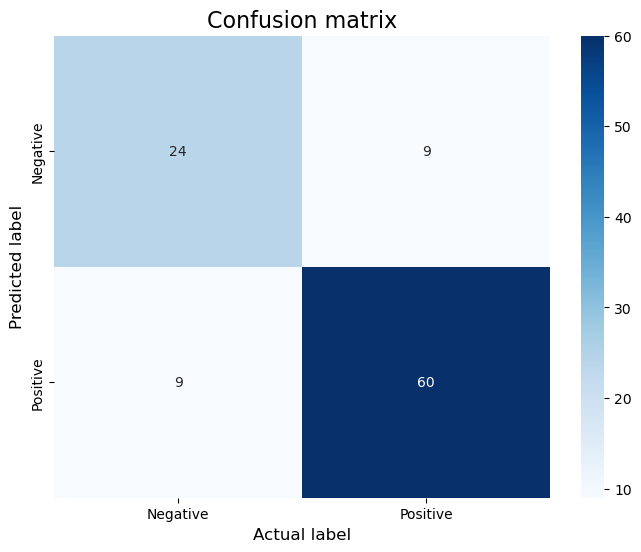

In [49]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)